In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\dheep\anaconda5\anoconda 4\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split
data = pd.read_csv("Esophageal_Dataset.csv")

In [3]:

from lifelines import KaplanMeierFitter, CoxPHFitter


In [4]:
survival_data = data[[
    'primary_pathology_age_at_initial_pathologic_diagnosis', 'gender', 
    'stage_event_pathologic_stage', 'primary_pathology_residual_tumor', 
    'primary_pathology_lymph_node_examined_count', 'primary_pathology_radiation_therapy', 
    'primary_pathology_postoperative_rx_tx', 'primary_pathology_karnofsky_performance_score', 
    'primary_pathology_eastern_cancer_oncology_group', 'days_to_death', 
    'days_to_last_followup', 'vital_status'
]].copy()

In [5]:
survival_data.columns = [
    'age_at_diagnosis', 'gender', 'cancer_stage', 'residual_tumor', 
    'lymph_node_exam', 'radiation_therapy', 'postoperative_treatment', 
    'karnofsky_score', 'ecog_status', 'days_to_death', 
    'days_to_last_followup', 'vital_status'
]

In [6]:
survival_data['survival_time'] = survival_data[['days_to_death', 'days_to_last_followup']].min(axis=1)
survival_data['event_occurred'] = (survival_data['vital_status'] == 'Dead').astype(int)


In [7]:
survival_data = survival_data.drop(columns=['days_to_death', 'days_to_last_followup', 'vital_status'])


In [8]:
survival_data.head()

,age_at_diagnosis,gender,cancer_stage,residual_tumor,lymph_node_exam,radiation_therapy,postoperative_treatment,karnofsky_score,ecog_status,survival_time,event_occurred
0,67,MALE,Stage III,R1,8.0,NO,NO,NaN,NaN,784.0,1
1,66,MALE,Stage III,R1,19.0,NO,NO,NaN,NaN,610.0,1
2,44,MALE,Stage IIB,R0,30.0,NO,NO,NaN,NaN,951.0,1
3,68,MALE,Stage III,R0,8.0,NO,NO,NaN,NaN,435.0,1
4,57,MALE,Stage I,R0,19.0,NO,NO,NaN,NaN,1781.0,1


In [9]:

kmf = KaplanMeierFitter()


In [10]:
print(survival_data.head())


print(survival_data.describe(include='all'))


print(survival_data.isnull().sum())


print(survival_data.dtypes)

   age_at_diagnosis gender cancer_stage residual_tumor  lymph_node_exam  \
0                67   MALE    Stage III             R1              8.0   
1                66   MALE    Stage III             R1             19.0   
2                44   MALE    Stage IIB             R0             30.0   
3                68   MALE    Stage III             R0              8.0   
4                57   MALE      Stage I             R0             19.0   

  radiation_therapy postoperative_treatment  karnofsky_score  ecog_status  \
0                NO                      NO              NaN          NaN   
1                NO                      NO              NaN          NaN   
2                NO                      NO              NaN          NaN   
3                NO                      NO              NaN          NaN   
4                NO                      NO              NaN          NaN   

   survival_time  event_occurred  
0          784.0               1  
1          610.0

C:\Users\dheep\anaconda5\anoconda 4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


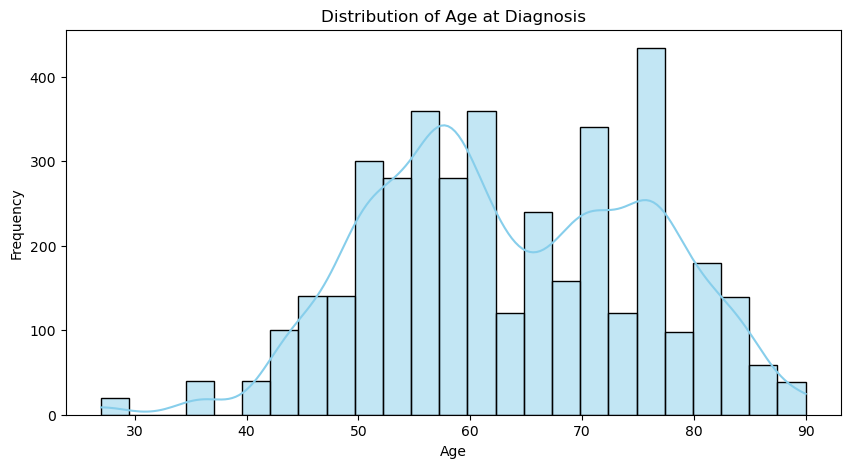

In [11]:
#numerical
plt.figure(figsize=(10, 5))
sns.histplot(survival_data['age_at_diagnosis'], kde=True, color='skyblue')
plt.title('Distribution of Age at Diagnosis')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


C:\Users\dheep\anaconda5\anoconda 4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


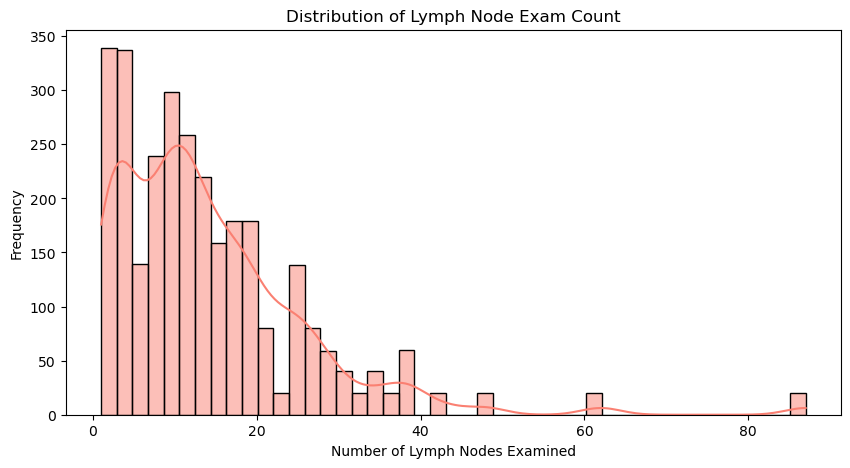

In [12]:
#numerical
plt.figure(figsize=(10, 5))
sns.histplot(survival_data['lymph_node_exam'].dropna(), kde=True, color='salmon')
plt.title('Distribution of Lymph Node Exam Count')
plt.xlabel('Number of Lymph Nodes Examined')
plt.ylabel('Frequency')
plt.show()

C:\Users\dheep\anaconda5\anoconda 4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


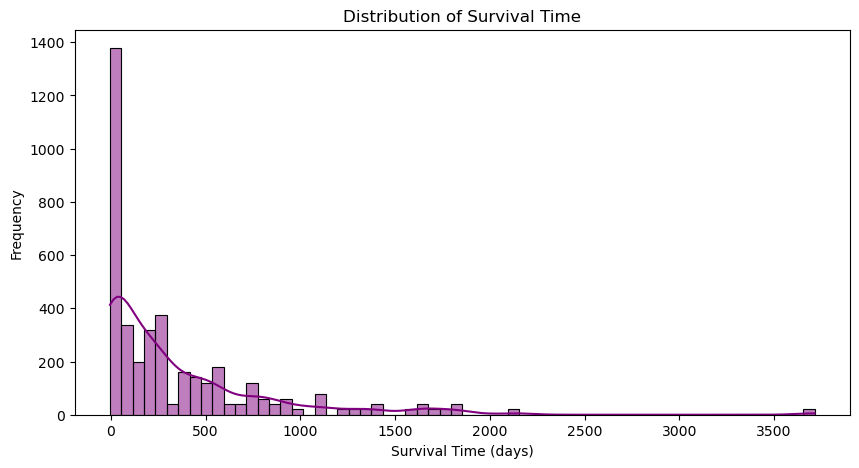

In [13]:
#numerical
plt.figure(figsize=(10, 5))
sns.histplot(survival_data['survival_time'], kde=True, color='purple')
plt.title('Distribution of Survival Time')
plt.xlabel('Survival Time (days)')
plt.ylabel('Frequency')
plt.show()


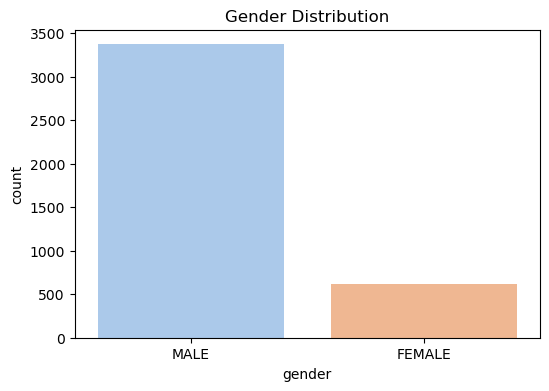

In [14]:
#categorical
plt.figure(figsize=(6, 4))
sns.countplot(data=survival_data, x='gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()

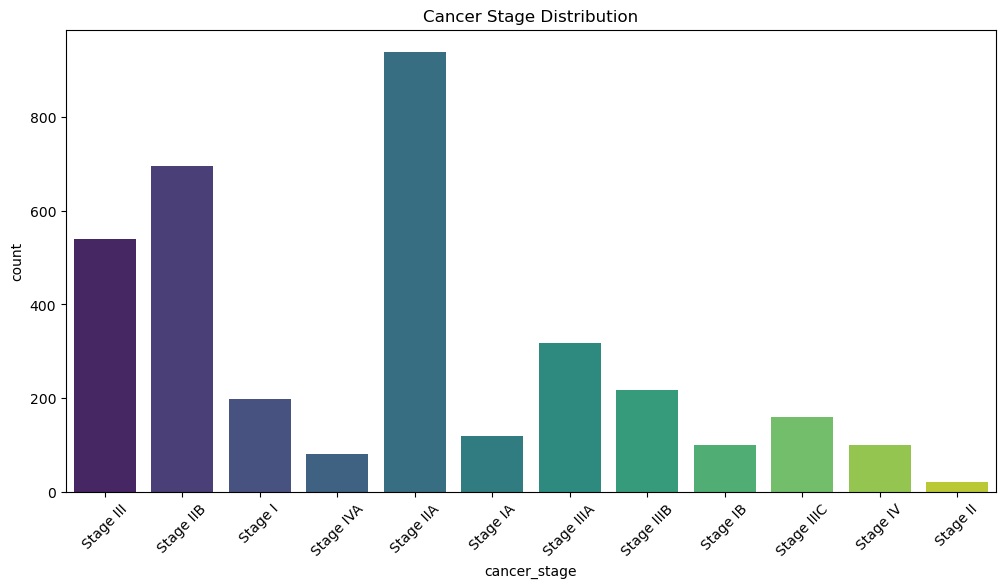

In [15]:
#categorical
plt.figure(figsize=(12, 6))
sns.countplot(data=survival_data, x='cancer_stage', palette='viridis')
plt.title('Cancer Stage Distribution')
plt.xticks(rotation=45)
plt.show()

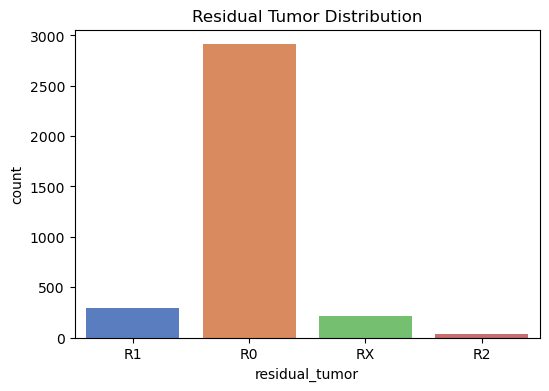

In [16]:
#categorical
plt.figure(figsize=(6, 4))
sns.countplot(data=survival_data, x='residual_tumor', palette='muted')
plt.title('Residual Tumor Distribution')
plt.show()

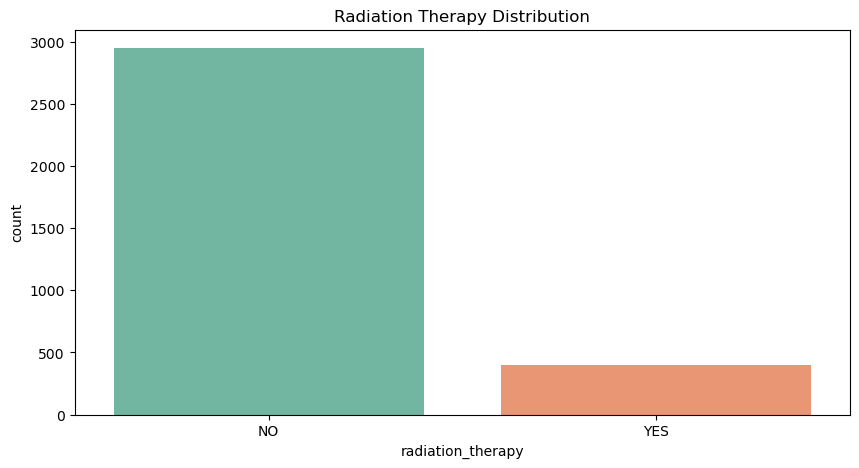

In [17]:
#categorical
plt.figure(figsize=(10, 5))
sns.countplot(data=survival_data, x='radiation_therapy', palette='Set2')
plt.title('Radiation Therapy Distribution')
plt.show()


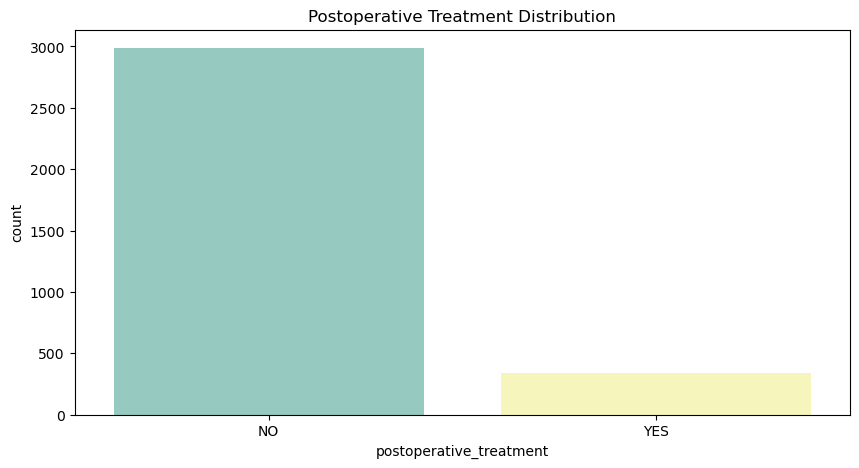

In [18]:
#categorical
plt.figure(figsize=(10, 5))
sns.countplot(data=survival_data, x='postoperative_treatment', palette='Set3')
plt.title('Postoperative Treatment Distribution')
plt.show()

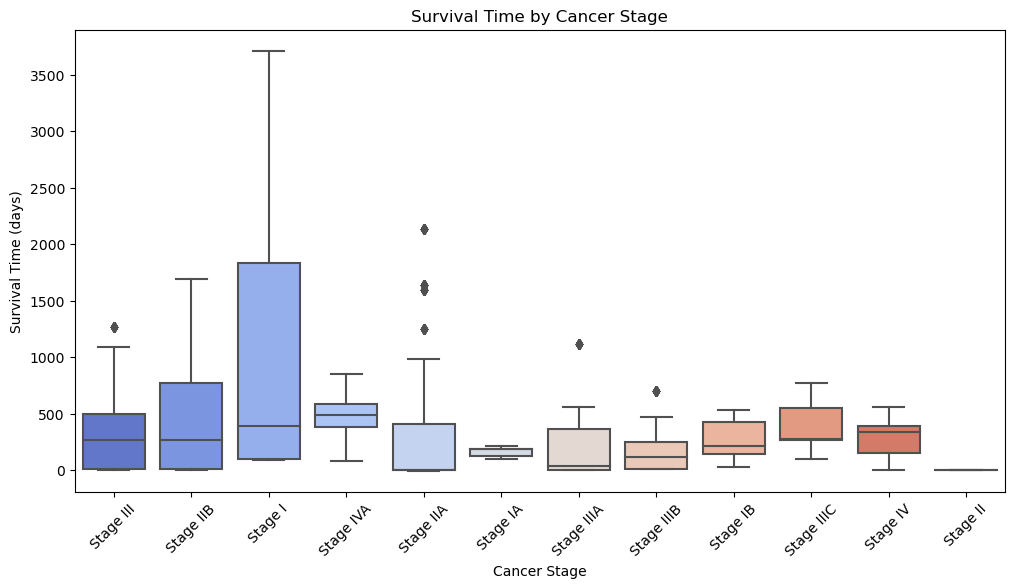

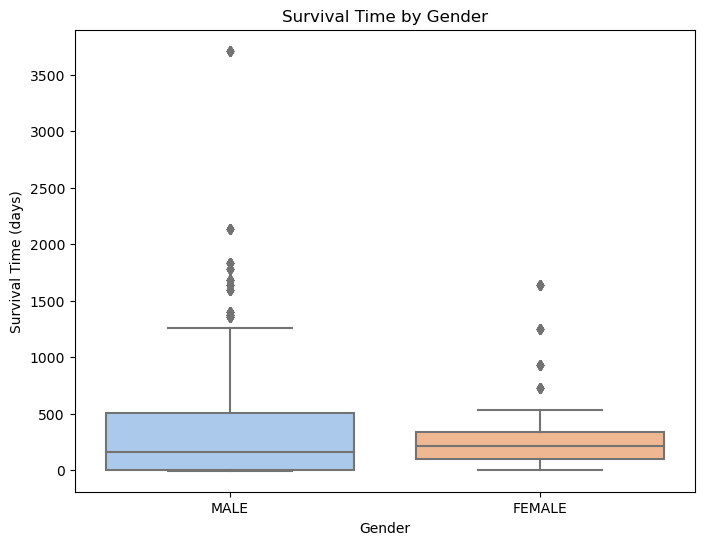

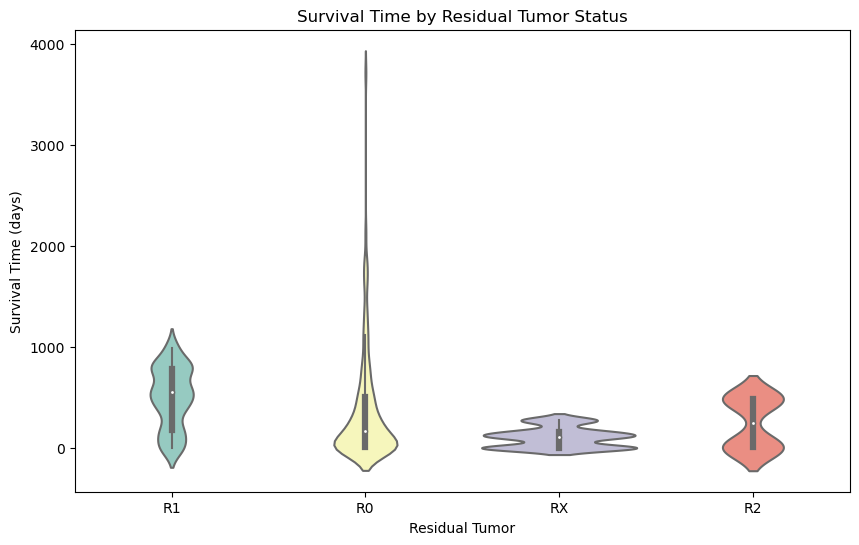

In [19]:
#survival time
#relationship Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=survival_data, x='cancer_stage', y='survival_time', palette='coolwarm')
plt.title('Survival Time by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Time (days)')
plt.xticks(rotation=45)
plt.show()
#relationship Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=survival_data, x='gender', y='survival_time', palette='pastel')
plt.title('Survival Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Time (days)')
plt.show()
#relationship violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(data=survival_data, x='residual_tumor', y='survival_time', palette='Set3')
plt.title('Survival Time by Residual Tumor Status')
plt.xlabel('Residual Tumor')
plt.ylabel('Survival Time (days)')
plt.show()

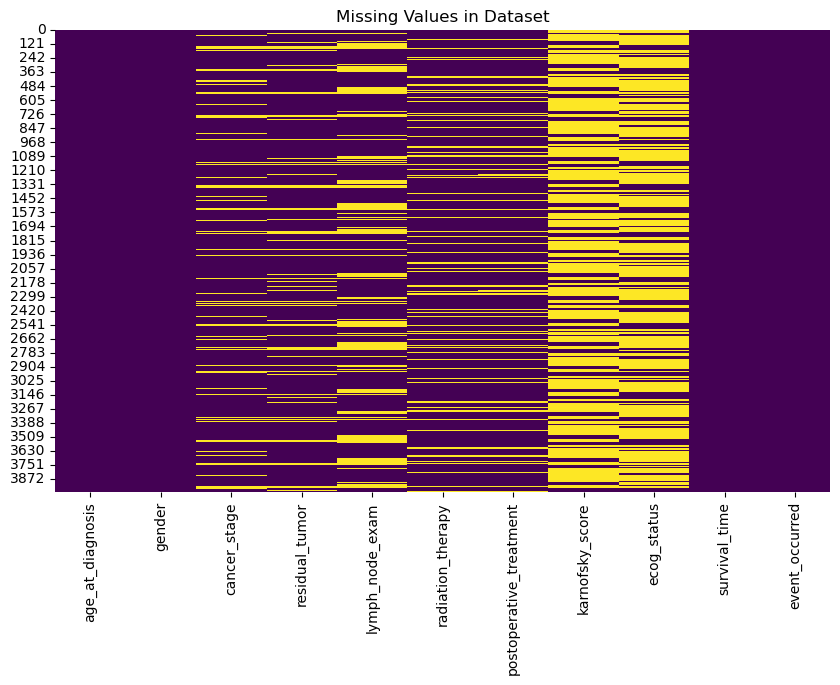

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(survival_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

In [21]:
missing_percentages = survival_data.isnull().mean() * 100
print(missing_percentages[missing_percentages > 0].sort_values(ascending=False))

ecog_status                65.947302
karnofsky_score            65.872020
lymph_node_exam            25.094103
postoperative_treatment    16.511920
radiation_therapy          16.010038
residual_tumor             13.048934
cancer_stage               12.496863
dtype: float64


In [22]:
survival_data['ecog_status'] = survival_data['ecog_status'].fillna(survival_data['ecog_status'].mean())
survival_data['karnofsky_score'] = survival_data['karnofsky_score'].fillna(survival_data['karnofsky_score'].mean())


In [23]:
survival_data['lymph_node_exam'] = survival_data['lymph_node_exam'].fillna(survival_data['lymph_node_exam'].median())

In [24]:
survival_data['postoperative_treatment'] = survival_data['postoperative_treatment'].fillna(survival_data['postoperative_treatment'].mode()[0])
survival_data['radiation_therapy'] = survival_data['radiation_therapy'].fillna(survival_data['radiation_therapy'].mode()[0])
survival_data['residual_tumor'] = survival_data['residual_tumor'].fillna(survival_data['residual_tumor'].mode()[0])
survival_data['cancer_stage'] = survival_data['cancer_stage'].fillna(survival_data['cancer_stage'].mode()[0])

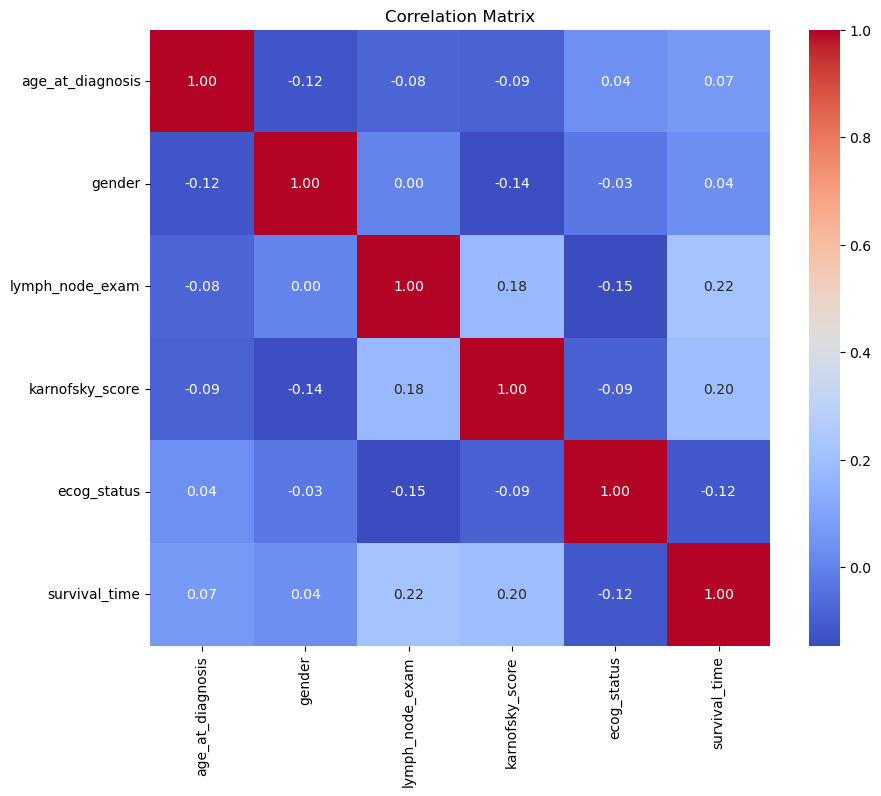

In [25]:
survival_data['gender'] = survival_data['gender'].map({'MALE': 1, 'FEMALE': 0})
survival_data['cancer_stage'] = survival_data['cancer_stage'].astype('category').cat.codes


numeric_cols = survival_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


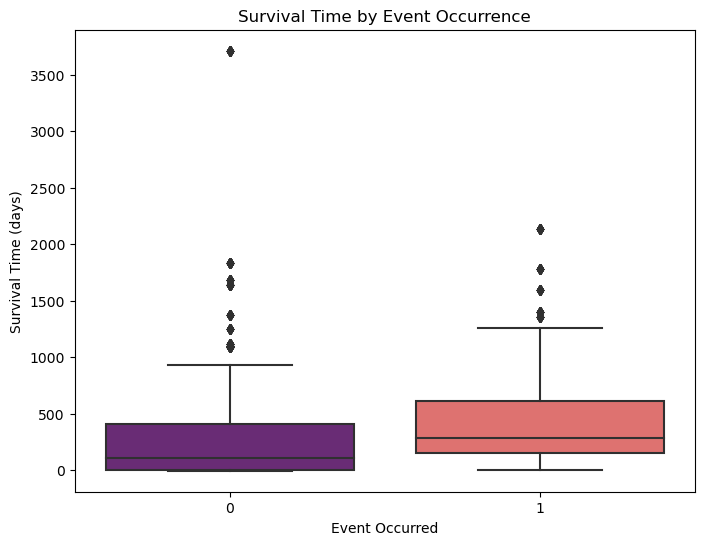

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=survival_data, x='event_occurred', y='survival_time', palette='magma')
plt.title('Survival Time by Event Occurrence')
plt.xlabel('Event Occurred')
plt.ylabel('Survival Time (days)')
plt.show()

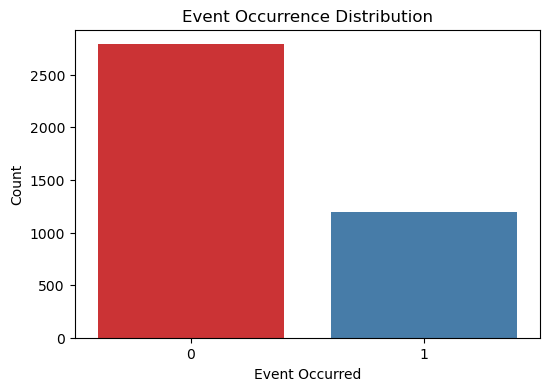

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=survival_data, x='event_occurred', palette='Set1')
plt.title('Event Occurrence Distribution')
plt.xlabel('Event Occurred')
plt.ylabel('Count')
plt.show()

In [28]:
survival_data.dropna()
data=survival_data
survival_data

,age_at_diagnosis,gender,cancer_stage,residual_tumor,lymph_node_exam,radiation_therapy,postoperative_treatment,karnofsky_score,ecog_status,survival_time,event_occurred
0,67,1,6,R1,8.0,NO,NO,73.823529,1.015475,784.0,1
1,66,1,6,R1,19.0,NO,NO,73.823529,1.015475,610.0,1
2,44,1,5,R0,30.0,NO,NO,73.823529,1.015475,951.0,1
3,68,1,6,R0,8.0,NO,NO,73.823529,1.015475,435.0,1
4,57,1,0,R0,19.0,NO,NO,73.823529,1.015475,1781.0,1
...,...,...,...,...,...,...,...,...,...,...,...
3980,53,1,5,R0,19.0,NO,NO,90.000000,2.000000,20.0,0
3981,57,1,7,RX,9.0,NO,NO,80.000000,2.000000,0.0,0
3982,53,1,7,R0,12.0,NO,NO,73.823529,1.015475,15.0,0
3983,57,1,4,R0,11.0,NO,NO,73.823529,1.015475,18.0,0


In [29]:

data['cancer_stage'] = data['cancer_stage'].astype('category').cat.codes
data['residual_tumor'] = data['residual_tumor'].astype('category').cat.codes
data['radiation_therapy'] = data['radiation_therapy'].map({'YES': 1, 'NO': 0})
data['postoperative_treatment'] = data['postoperative_treatment'].map({'YES': 1, 'NO': 0})

data.head(10)


,age_at_diagnosis,gender,cancer_stage,residual_tumor,lymph_node_exam,radiation_therapy,postoperative_treatment,karnofsky_score,ecog_status,survival_time,event_occurred
0,67,1,6,1,8.0,0,0,73.823529,1.015475,784.0,1
1,66,1,6,1,19.0,0,0,73.823529,1.015475,610.0,1
2,44,1,5,0,30.0,0,0,73.823529,1.015475,951.0,1
3,68,1,6,0,8.0,0,0,73.823529,1.015475,435.0,1
4,57,1,0,0,19.0,0,0,73.823529,1.015475,1781.0,1
5,43,1,6,0,5.0,0,0,73.823529,1.015475,232.0,1
6,74,1,6,1,7.0,0,0,73.823529,1.015475,180.0,1
7,53,1,5,0,13.0,0,0,73.823529,1.015475,424.0,1
8,70,1,6,0,22.0,0,0,73.823529,1.015475,272.0,1
9,58,1,11,1,13.0,0,0,73.823529,1.015475,494.0,1


In [30]:
X = data.drop(columns=['survival_time', 'event_occurred'])  
Y = data[['survival_time', 'event_occurred']]

In [31]:
data = data.dropna()

print(data.isnull().sum())

age_at_diagnosis           0
gender                     0
cancer_stage               0
residual_tumor             0
lymph_node_exam            0
radiation_therapy          0
postoperative_treatment    0
karnofsky_score            0
ecog_status                0
survival_time              0
event_occurred             0
dtype: int64


In [35]:
from sklearn.model_selection import train_test_split
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index


train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)


coxph = CoxPHFitter()

coxph.fit(train_data, duration_col='survival_time', event_col='event_occurred')
coxph.print_summary()

<lifelines.CoxPHFitter: fitted with 2789 total observations, 1959 right-censored observations>
             duration col = 'survival_time'
                event col = 'event_occurred'
      baseline estimation = breslow
   number of observations = 2789
number of events observed = 830
   partial log-likelihood = -5269.73
         time fit was run = 2024-11-14 18:48:06 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
age_at_diagnosis        -0.01      0.99      0.00           -0.02           -0.01                0.98                0.99
gender                   0.48      1.62      0.13            0.22            0.75                1.24                2.11
cancer_stage             0.20      1.23      0.02            0.17            0.23                1.19                1.26
residual_tumor           0.68      1.96      0.05            0.57            0.78                1.78                2.17
lymph_node_exam         -0.05      0.96      0.00           -0.06           -0.04                0.95                0.96
radiation_therapy       -0.71      0.49      0.13           -0.96           -0.46                0.38                0.63
postoperative_treatment  0.27      1.31      0.13            0.02            0.52                1.02                1.69
karnofsky_score          0.02      1.02      0.01            0.01            0.03                1.01                1.03
ecog_status             -0.21      0.81      0.10           -0.41           -0.00                0.67                1.00

                         cmp to     z      p  -log2(p)
covariate                                             
age_at_diagnosis           0.00 -4.43 <0.005     16.69
gender                     0.00  3.59 <0.005     11.55
cancer_stage               0.00 12.93 <0.005    124.62
residual_tumor             0.00 13.20 <0.005    129.75
lymph_node_exam            0.00 -9.55 <0.005     69.36
radiation_therapy          0.00 -5.56 <0.005     25.18
postoperative_treatment    0.00  2.10   0.04      4.81
karnofsky_score            0.00  3.23 <0.005      9.64
ecog_status                0.00 -2.00   0.05      4.45
---
Concordance = 0.67
Partial AIC = 10557.46
log-likelihood ratio test = 480.75 on 9 df
-log2(p) of ll-ratio test = 322.63

In [36]:
test_data['predicted_risk'] = coxph.predict_partial_hazard(test_data)

In [37]:

survival_predictions = coxph.predict_survival_function(test_data)


In [38]:
def median_survival_time(surv_func):
    median_time = surv_func.index[surv_func <= 0.5].min()
    return median_time if pd.notnull(median_time) else surv_func.index[-1]

In [39]:
test_data['predicted_survival_time'] = survival_predictions.apply(median_survival_time, axis=0)


In [40]:
risk_threshold = test_data['predicted_risk'].median()  # Define threshold based on median risk
test_data['predicted_event_occurred'] = (test_data['predicted_risk'] >= risk_threshold).astype(int)


In [41]:
c_index = concordance_index(test_data['survival_time'], -test_data['predicted_risk'], test_data['event_occurred'])
print(f"Concordance Index (C-index) on Test Set: {c_index}")


Concordance Index (C-index) on Test Set: 0.6220204107528051


In [42]:
print(test_data[['predicted_risk', 'predicted_survival_time', 'predicted_event_occurred']].head())

      predicted_risk  predicted_survival_time  predicted_event_occurred
408         0.733559                   1263.0                         0
2548        0.924624                    951.0                         0
682         1.586639                    557.0                         1
3160        0.826149                    987.0                         0
2356        2.015274                    494.0                         1
